## 09/05/2021

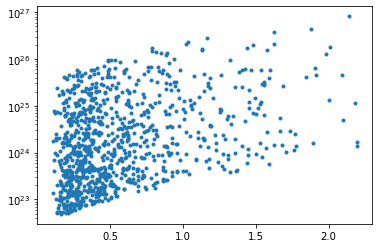

In [12]:
x,y=recover_sample(power=3, osize=1000)
plt.scatter(x[x<2.2],y[x<2.2], marker='.')
plt.yscale('log')

Text(0.5, 0, '')

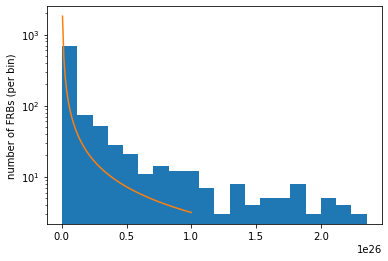

In [13]:
#proof that it works. anyway...
plt.hist(y[x<2.2]/g(x[x<2.2], 3)*2**3, bins=20)
plt.yscale('log')
xs = np.linspace(0.005e26, 1e26, 100)
plt.plot(xs, 12500*(xs/1e23)**(-1.2))
plt.ylabel('number of FRBs (per bin)')
plt.xlabel('')

In [29]:
binwidth=1e26/20

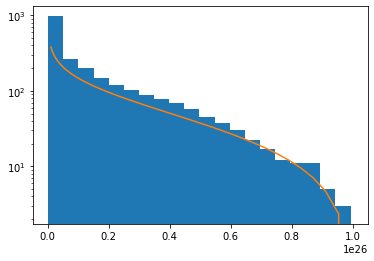

In [509]:
plt.hist(E_*(1.5**3), bins=20, cumulative=-1)
xs = np.logspace(24,26,100)

#expression for dN: 10000*1e23**1.2 * xs**(-1.2)
#expression for dN/dE: 10000*1e23**1.2 * xs**(-1.2) / binwidth
#expression for N: 10000*1e23**1.2 * 5*(xs**(-0.2)-10**(26*-0.2))/binwidth
plt.plot(xs,10000*1e23**1.2 * 5*(xs**(-0.2)-10**(26*-0.2))/binwidth)#5 *(xs**(-0.2)-10**(-26/5)))
plt.yscale('log')
#plt.xscale('log')

In [ ]:
x,y=recover_sample(power=3, osize=1000)
plt.scatter(x[x<2.2],y[x<2.2], marker='.')
plt.yscale('log')

#proof that it works. anyway...
plt.hist(y[x<2.2]/g(x[x<2.2], 3)*2**3, bins=20)
plt.yscale('log')
xs = np.linspace(0.005e26, 1e26, 100)
plt.plot(xs, 12500*(xs/1e23)**(-1.2))
plt.ylabel('number of FRBs (per bin)')
plt.xlabel('')

In [ ]:
z_Emodel = np.linspace(0, 3, 10000)
E_Emodel = E_v(2.0, z_Emodel, alpha=1.5)

def phi_E(Es, z, Flim, func=z_E, g=g, k=0, params=[1.5], model=[E_Emodel, z_Emodel]):
    #Note: we assume that Es, z are clean already (i.e. no points under the cutoff)
    #no need to be sorted, already sorted within this function
    
    gs = g(z,k)
    Emod, zmod = model
    Es_overg, z = sort_by_first(Es/gs, z)
    zmax = func(Es_overg, Emod/g(zmod, k), zmod)
    
    
    
    #DEBUG PLOT:
#     plt.scatter(z, Es_overg, marker='.')
#     plt.yscale('log')
#     P=-50
#     plt.scatter(z[P], Es_overg[P], s=200)
#     plt.hlines(Es_overg[P], 0, zmax[P])
#     print(zmax[P])
#     plt.plot(z_Emodel[100:], E_Emodel[100:])
    
    E_primes = []
    Es_raw = []
    ns = []
    
    for i in reversed(range(len(Es))):
        n_i = 0
        
        for j in range(len(Es)):
            if i == j: #skip over itself
                continue
                
            if (Es_overg[j] >= Es_overg[i] and z[j] <= zmax[i]): #associated set requirements
                n_i += 1
        
        ns.append(n_i)
        E_primes.append(Es_overg[i])
        Es_raw.append(Es_overg[i]*g(z[i],k))
    
    phis = [1]
    for i in range(1, len(E_primes)):
        phi_i = phis[i-1]*(1.+1./ns[i])
        phis.append(phi_i)
        
    return np.array(phis), np.array(E_primes), np.array(Es_raw)

def z_E(E_i, Es, zs):
    '''
    WARNING: may have issues if E(z) is non-monatonic 
    
    ----------I/O-----------
    INPUT: 
    E_i - a single value or np.array of Es
    Es - a pre-calculated & sorted list of Es
    zs - a pre-calculated & sorted list of zs, that align one-to-one with Es
    
    OUTPUT: 
    zs - linearly interpolated list of zs that correspond with the input E
    ------------------------
    '''
    return z_DM(E_i, Es, zs, E_setting=True)

def z_DM(DM_i, DMs, zs, E_setting=False):
    '''
    ----------I/O-----------
    INPUT: 
    DM_i - a single value or np.array of DMs
    DMs - a pre-calculated & sorted list of DMs
    zs - a pre-calculated & sorted list of zs, that align one-to-one with DMs
    E_setting - True means returning inf if DM > max(DMs); default is False
    
    OUTPUT: 
    zs - linearly interpolated list of zs that correspond with the input DM
    ------------------------
    '''
    
    if type(DM_i) != np.ndarray:
        return z_DM_single(DM_i, DMs, zs, E_setting=E_setting)
    
    z_f = np.zeros(len(DM_i))
    
    for i, DM in enumerate(DM_i):
        z_f[i] = z_DM_single(DM, DMs, zs, E_setting=E_setting)
    
    return z_f

def z_DM_single(DM, DMs, zs, E_setting=False): #assumes DMs and zs already sorted
    '''
    ----------I/O-----------
    INPUT: 
    DM - a single value
    DMs - a pre-calculated & sorted list of DMs
    zs - a pre-calculated & sorted list of zs, that align one-to-one with DMs
    E_setting - True means returning inf if DM > max(DMs); default is False
    
    OUTPUT: 
    zs - linearly interpolated z that correspond with the input DM
    ------------------------
    '''
    if E_setting and DM > max(DMs):
        return np.inf
    
    if(DM > max(DMs) or DM < min(DMs)):
        print(('E' if E_setting else 'DM') + 'out of range: ' + str(DM) + (' J/Hz' if E_setting else ' pc cm^-3'))
        return 0
    
    i = bleft(DMs, DM)
    
    if (i != bright(DMs, DM)): #means that DM is exactly within DMs
        return zs[i]

    #if not exactly equal to one of data points, linearly interpolate
    return zs[i-1] + (zs[i]-zs[i-1])*(DM-DMs[i-1])/(DMs[i]-DMs[i-1])

## 08/29/2021

In [ ]:
y_ = y/((1+x)/2)**(power)

the expected distribution is $\frac{dN}{dE} \propto E^{-1.2}$

in $\log{E}$ space, $\frac{dN}{d \log E} = \frac{dN}{dE} \left( \frac{d \log E}{dE} \right)^{-1} \propto
E^{-1.2} \times E = E^{-0.2}$

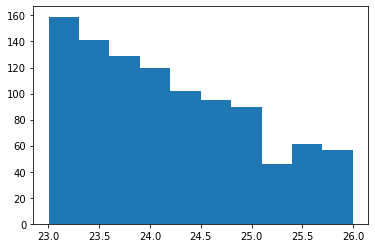

In [173]:
plt.hist(np.log10(y_))
plt.plot(160)
plt.show()

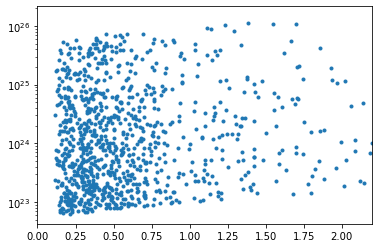

In [174]:
plt.scatter(x, y, marker='.')
plt.xlim([0,2.2])
plt.yscale('log')

## 08/22/2021

Text(0.5, 0, 'z')

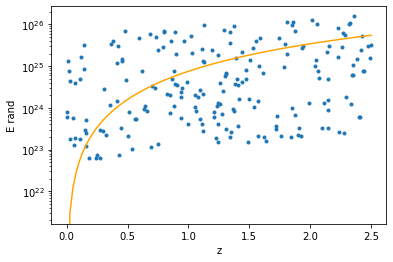

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from frbfuncs.cosmology import *

seed = 65
rng = np.random.default_rng(seed)
x = rng.random(200)*2.5
y = np.power(10,rng.random(200)*3+23)

zrand = np.linspace(0,2.5,100)

plt.scatter(x,y*((1+x)/2)**1, marker='.')
plt.plot(zrand, E_v(2.0, zrand, alpha=1.5), color='orange')
plt.yscale('log')
plt.ylabel('E rand')
plt.xlabel('z')

In [7]:
def rndm(a, b, g, size=1, seed=0):
    '''Power-law gen for pdf(x)\propto x^g for a<=x<=b'''
    if g >= -1:
        raise ValueError('g cannot be >= -1')
    
    g += 1
    rng = np.random.default_rng(seed)
    r = rng.random(size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

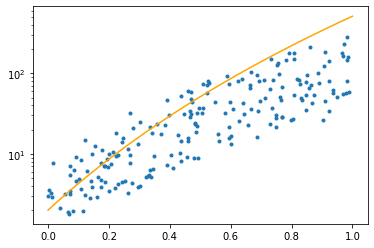

In [8]:
seed = 66
rng = np.random.default_rng(seed)
x = rng.random(200)
y = rndm(1, 10, -1.2, size=200, seed=seed*2)
y *= (1+x)**5

def lim(a,z,c):
    return (a)*(1+z)**8

def lim0(a,z,c):
    return z*0

plt.scatter(x,y, marker='.')
plt.plot(np.linspace(0,1,100), lim(2.0,np.linspace(0,1,100),*[1.5]), color='orange')
plt.yscale('log')

In [ ]:
def rndm(a, b, g, size=1, seed=0):
    '''Power-law gen for pdf(x)\propto x^g for a<=x<=b'''
    if g >= -1:
        raise ValueError('g cannot be >= -1')
    
    g += 1
    rng = np.random.default_rng(seed)
    r = rng.random(size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

## kendall tau on set of 9 points (last used 08/13/2021)

In [25]:
rng = np.random.default_rng(4)
xs = rng.integers(0, len(zs_clean)-1, size=5)

z_test = np.array([  0.2,  0.50,   0.35,  0.75,   0.55,   0.30,   0.45,   1.0, 2.0])
E_test = np.array([.5e24, 1e25, .5e25, 1e25, .5e25,   1.8e24,  3e24, 3e25, 1.83e26])
Elim_test = E_v(2.0, z_test, *params)

# E_test = Es_clean
# z_test = zs_clean
# Elim_test = Elim_clean

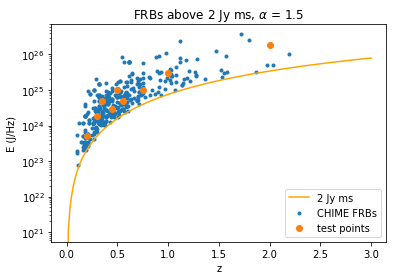

In [26]:
plt.scatter(zs_clean, Es_clean, marker='.', label='CHIME FRBs')
plt.scatter(z_test, E_test, label='test points')
plt.plot(zcuts, Ecuts, color='orange', label='2 Jy ms')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('E (J/Hz)')
plt.title(f'FRBs above 2 Jy ms, $\\alpha$ = {alpha}')
#plt.savefig('../../test_on_data.png', dpi=600)
plt.legend()

5.754582633749497


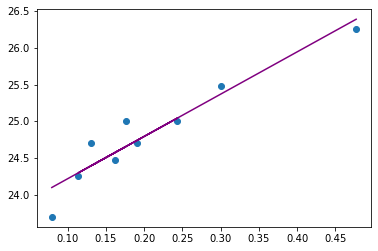

In [27]:
plt.scatter(np.log10(1+z_test), np.log10(E_test))
m, b = np.polyfit(np.log10(1+z_test), (np.log10(E_test)), 1)
plt.plot(np.log10(1+z_test), (m*np.log10(1+z_test)+b), color='purple')
print(m)

Text(0.5, 1.0, 'k=6')

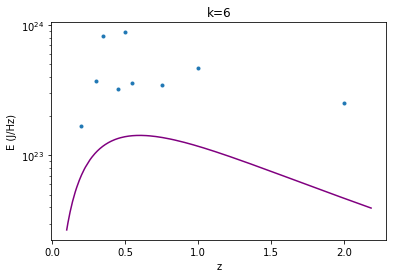

In [28]:
#plt.scatter(zs_clean, Es_clean, marker='.')
k_test = 6
plt.scatter(z_test, E_test/g(z_test, k_test), marker='.')
#plt.xlim([0, 3])
#plt.ylim([1e21, 1e27])
#plt.plot(zcuts, Ecuts, color='orange')
#plt.plot(sorted(z_test), sorted(Elim_test), color='purple')
plt.plot(sorted(zs_clean), sorted(Elim_clean)/g(zs_clean, k_test), color='purple')
plt.yscale('log')
plt.ylabel('E (J/Hz)')
plt.xlabel('z')
plt.title(f'k={k_test}')
#plt.savefig(f'../../k={k_test}.png', dpi=600)

In [29]:
ks = np.linspace(0, 10, 51)

taus = np.zeros(len(ks))
tau_Es = np.zeros(len(ks))

for i, k in enumerate(ks):
    taus[i] = ktau(E_test, z_test, 2., g=g, k=k, params=params)
    tau_Es[i] = ktau_E(E_test, Elim_test, z_test, g=g, k=k)

In [30]:
ktau(E_test, z_test, 2.0, g=g, k=5, params=params)

1.4893769661881222

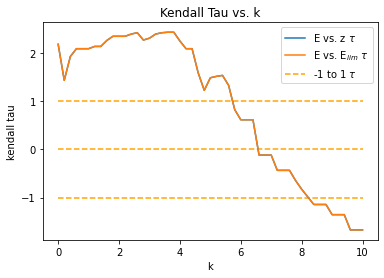

In [31]:
plt.plot(ks, taus, label='E vs. z $\\tau$')
plt.plot(ks, tau_Es, label='E vs. E$_{lim}$ $\\tau$')

plt.hlines([-1, 0, 1], min(ks), max(ks), color='orange', linestyle='--', label='-1 to 1 $\\tau$')

#one = np.argwhere(np.diff(np.sign(taus-1))).flatten()
#zer = np.argwhere(np.diff(np.sign(taus))).flatten()
#neg = np.argwhere(np.diff(np.sign(taus+1))).flatten()


#plt.vlines([ks[one], ks[zer], ks[neg]], min(taus), max(taus), color='black', label=f'range of k: \n{round(min(ks[one][0], ks[neg][0]), 2)}-{round(max(ks[one][0], ks[neg][0]),2)}', linestyle='--')

#plt.xlim(min(ks), max(ks))
#plt.ylim(min(taus), max(taus))

plt.xlabel('k')
plt.ylabel('kendall tau')
plt.title('Kendall Tau vs. k')
plt.legend()
#plt.savefig('ktau_edited.png', dpi=600)
plt.show()

## kendall tau on random 20 points

In [24]:
rng = np.random.default_rng(4)
xs = rng.integers(0, len(zs_clean)-1, size=5)

z_test = np.array([  0.2,  0.3,   0.4,  0.4,   0.5,   0.35,   .45,   1.0, 2.0])
E_test = np.array([.5e24, 1e24, .5e25, 2e24, .5e25,   1.8e24,  3e24, 3e25, 7e25])
Elim_test = E_v(2.0, z_test, *params)

# E_test = Es_clean
# z_test = zs_clean
# Elim_test = Elim_clean

In [25]:
print('z  E  E_limit')
for i, z in enumerate(z_test):
    print(z, E_test[i], Elim_test[i])

z  E  E_limit
0.2 5e+23 2.1069983022483562e+23
0.3 1e+24 5.091137333435279e+23
0.4 5e+24 9.619247017591622e+23
0.4 2e+24 9.619247017591622e+23
0.5 5e+24 1.5834916645450477e+24
0.35 1.8e+24 7.152356196156527e+23
0.45 3e+24 1.250856764065261e+24
1.0 3e+25 7.513220559953703e+24
2.0 7e+25 3.4188133253319083e+25


5.212091054442486


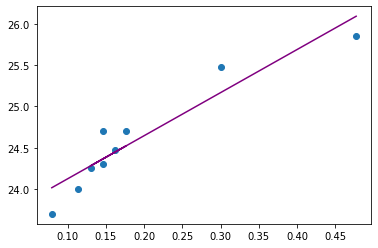

In [26]:
plt.scatter(np.log10(1+z_test), np.log10(E_test))
m, b = np.polyfit(np.log10(1+z_test), (np.log10(E_test)), 1)
plt.plot(np.log10(1+z_test), (m*np.log10(1+z_test)+b), color='purple')
print(m)

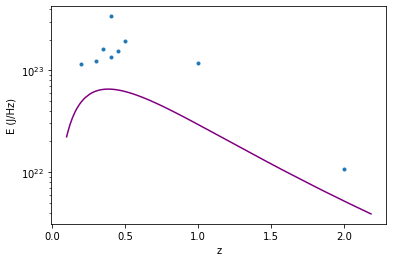

In [27]:
#plt.scatter(zs_clean, Es_clean, marker='.')
k_test = 8
plt.scatter(z_test, E_test/g(z_test, k_test), marker='.')
#plt.xlim([0, 3])
#plt.ylim([1e21, 1e27])
#plt.plot(zcuts, Ecuts, color='orange')
#plt.plot(sorted(z_test), sorted(Elim_test), color='purple')
plt.plot(sorted(zs_clean), sorted(Elim_clean)/g(zs_clean, k_test), color='purple')
plt.yscale('log')
plt.ylabel('E (J/Hz)')
plt.xlabel('z')
plt.savefig('../../k=8.png', dpi=600)

In [149]:
ks = np.linspace(0, 10, 51)

taus = np.zeros(len(ks))
tau_Es = np.zeros(len(ks))

for i, k in enumerate(ks):
    taus[i] = ktau(E_test, z_test, 2., g=g, k=k, params=params)
    tau_Es[i] = ktau_E(E_test, Elim_test, z_test, g=g, k=k)

In [153]:
ktau(E_test, z_test, 2.0, g=g, k=10, params=params)

-0.9359577838057601

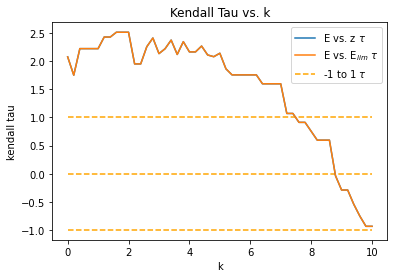

In [151]:
plt.plot(ks, taus, label='E vs. z $\\tau$')
plt.plot(ks, tau_Es, label='E vs. E$_{lim}$ $\\tau$')

plt.hlines([-1, 0, 1], min(ks), max(ks), color='orange', linestyle='--', label='-1 to 1 $\\tau$')

#one = np.argwhere(np.diff(np.sign(taus-1))).flatten()
#zer = np.argwhere(np.diff(np.sign(taus))).flatten()
#neg = np.argwhere(np.diff(np.sign(taus+1))).flatten()


#plt.vlines([ks[one], ks[zer], ks[neg]], min(taus), max(taus), color='black', label=f'range of k: \n{round(min(ks[one][0], ks[neg][0]), 2)}-{round(max(ks[one][0], ks[neg][0]),2)}', linestyle='--')

#plt.xlim(min(ks), max(ks))
#plt.ylim(min(taus), max(taus))

plt.xlabel('k')
plt.ylabel('kendall tau')
plt.title('Kendall Tau vs. k')
plt.legend()
#plt.savefig('ktau_edited.png', dpi=600)
plt.show()

## trying the old data 🤦

In [ ]:
oldata = pd.read_csv("./data/old/updatedfrbs.csv")
oldata.columns = ['frb', 'telescope', 'snr', 'f_p', 'd_L', 'z', 'DM', 'W', 'fl']

#estimate the peak flux of FRBs from 27:54 (27-53)
oldata['f_p'][27:54] = oldata['fl'][27:54]/oldata['W'][27:54]

#create L_p
oldata['L_p'] = (oldata['f_p']*1e-19)*4*math.pi*(oldata['d_L']*3.08567758e25)**2

#create L_lim
#0:32 ASKAP, 32:62: CHIME, 62:90: Parkes
f_lim = [14.8, 0.30, 0.30]
slices = [slice(0,32), slice(32,62), slice(62,90)]
a_Llim, c_Llim, p_Llim = [oldata['L_p'][slices[i]]*f_lim[i]/oldata['f_p'][slices[i]] for i in range(3)]
oldata['L_lim'] = pd.concat([a_Llim, c_Llim, p_Llim], ignore_index=True)

#removing the evil point
oldata = oldata.drop(82)
oldata = oldata.reset_index(drop=True)

In [ ]:
PAC = slice(32,89)

def L_lim1(F_lim, z_i, params=None): #finds the limiting luminosity using flux, luminosity distance, and g
    return (F_lim*1e-19)*4*math.pi*(D_L(z_i)*c/H_0)**2

In [ ]:
plt.scatter(oldata['z'][PAC], oldata['L_p'][PAC])
plt.plot(sorted(oldata['z'][PAC]), L_lim1(0.3, np.array(sorted(oldata['z'][PAC]))), color='orange')
plt.yscale('log')


In [ ]:
Ls_old = np.array(oldata['L_p'][PAC])
zs_old = np.array(oldata['z'][PAC])

ks = np.linspace(-15, 15, 51)
taus = np.zeros(len(ks))

for i, k in enumerate(ks):
    taus[i] = ktau(Ls_old, zs_old, 0.3, func=L_lim1, g=g, k=k)

In [ ]:
plt.plot(ks, taus, label='E vs. z $\\tau$')

plt.hlines([-1, 0, 1], min(ks), max(ks), color='orange', linestyle='--', label='-1 to 1 $\\tau$')

one = np.argwhere(np.diff(np.sign(taus-1))).flatten()
zer = np.argwhere(np.diff(np.sign(taus))).flatten()
neg = np.argwhere(np.diff(np.sign(taus+1))).flatten()


plt.vlines([ks[one][0], ks[zer][0], ks[neg][0]], min(taus), max(taus), color='black', label=f'range of k: \n{round(min(ks[one][0], ks[neg][0]), 2)}-{round(max(ks[one][0], ks[neg][0]),2)}', linestyle='--')

plt.xlim(min(ks), max(ks))
plt.ylim(min(taus), max(taus))

plt.xlabel('k')
plt.ylabel('kendall tau')
plt.title('Kendall Tau vs. k')
plt.legend()
#plt.savefig('ktau_edited.png', dpi=600)
plt.show()

In [ ]:
ks[zer]

# experimental section

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def rndm(a, b, g, size=1, seed=0):
    '''Power-law gen for pdf(x)\propto x^g for a<=x<=b'''
    if g >= -1:
        raise ValueError('g cannot be >= -1')
    
    g += 1
    rng = np.random.default_rng(seed)
    r = rng.random(size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

def pdf(x, a, b, g):
    g += 1
    ag, bg = a**g, b**g
    return g * x**(g-1) / (bg - ag)

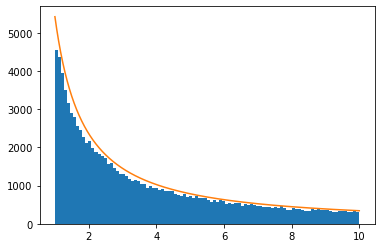

In [13]:
plt.hist(rndm(1,10, -1.2, size=100000), bins=100)
x = np.linspace(1,10,1000)
plt.plot(x, pdf(x, 1, 10, -1.2)*10000)
plt.show()